-TSNE References:

-https://towardsdatascience.com/google-news-and-leo-tolstoy-visualizing-word2vec-word-embeddings-with-t-sne-11558d8bd4d

-https://towardsdatascience.com/why-you-are-using-t-sne-wrong-502412aab0c0

-https://distill.pub/2016/misread-tsne/

In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')  
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\awskr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\awskr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\awskr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import os
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Import Training Data

In [3]:
fields= ['Article text','formatted_text','tokenize_sentences','formatted_no_stopwords','word_freq','sentence_scores']
df = pd.read_csv('text-summarization.csv', skipinitialspace=True, usecols=fields)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Article text            4076 non-null   object
 1   formatted_text          4076 non-null   object
 2   tokenize_sentences      4076 non-null   object
 3   formatted_no_stopwords  4076 non-null   object
 4   word_freq               4076 non-null   object
 5   sentence_scores         4076 non-null   object
dtypes: object(6)
memory usage: 191.2+ KB


# Clean the Data

In [4]:
#split your data to test and train
#from sklearn.model_selection import train_test_split
#train, test = train_test_split(df, test_size=0.1, random_state=58,stratify=df['Sentiment'])

In [5]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
#import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords 
stop = stopwords.words('english')
stop.extend(['also','tuesday','u','spglobal','com','jun','dow','jones','inc','keywords','newsrx','include','editor','according','including','related','said','june','word','table','year','nov','oct','ii','llc','corp','via','september','djdn','copyright','english','pr','newswire'])
#stop = set(stopwords.words('english'))

#exclude_words = set(('if','to','above','after','before','below','down','but','above, ''until', 'while','about','against','again', 'further','why', 'how', 'all', 'any', 'both', 
            #'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 
            #'own', 'same', 'so', 'than', 'too', 'very', 's', 't' 'can', 'will', 'just', 
            #'don', "don't", 'should', "should've", 'now', 
            #'ve', 'ain', 'aren', "aren't", 'couldn', "couldn't",
            #'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 
            #'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
            #'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 
            #'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"))

#new_stop = stop.difference(exclude_words)
new_stop = stop

In [6]:
def parsed_words(df):
    tk_sentences=[]

    for irow in df['Article text']:

        #tokenize and remove punctuations and change lowercase
        Rtokenizer = nltk.RegexpTokenizer(r"\w+")
        new_words = Rtokenizer.tokenize(irow.lower())
        #new_words = [character for character in new_words if character.isalnum()] #take out alphanum
        new_words = [character for character in new_words if character.isalpha()]

        #new_sentences = sent_tokenize(irow.lower())


        #remove stop words
        no_stopwords = [w for w in new_words if not w in new_stop] 
   
        #lemmatize each word to its lemma
        lemma_words = [lemmatizer.lemmatize(i) for i in no_stopwords]
    
        #reviews.append(new_sentences)
        tk_sentences.append(lemma_words)

    return(tk_sentences)

In [7]:
#parse into sentences as a feature
train_cleanreview=parsed_words(df)
#test_cleanreview= parsed_words(test)

print(len(train_cleanreview))
#print(len(test_cleanreview))

4076


# WORD2VEC

In [8]:
!pip install gensim==3.8

In [10]:

import gensim  

EMBEDDING_DIM=300

word2vecmodel =gensim.models.Word2Vec(sentences=train_cleanreview, size=300, window=3,workers=3,min_count=10)
word2vecmodel.init_sims(replace=True)

words =list(word2vecmodel.wv.vocab)
print('vocab size: %d' % len(words))

vocab size: 14477


In [11]:
word2vecmodel.wv.syn0.shape

C:\Users\awskr\AppData\Local\Temp/ipykernel_14812/2741779874.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  word2vecmodel.wv.syn0.shape


(14477, 300)

In [12]:
#save the file 
word2vec_model_8 = "Word2Vec_Sentiment_Analysis" + 'word2vec_' + str(300) + '.model'
word2vecmodel.save(word2vec_model_8)

In [13]:
#load the file
import gensim
word2vecmodel = gensim.models.Word2Vec.load(word2vec_model_8)
words =list(word2vecmodel.wv.vocab)
print('vocab size: %d' % len(words))

vocab size: 14477


In [14]:
word2vecmodel.wv.most_similar('tracing')

[('rigorous', 0.9330803155899048),
 ('requiring', 0.9030367732048035),
 ('evaluated', 0.8954999446868896),
 ('compulsory', 0.8935145139694214),
 ('pcr', 0.8929128646850586),
 ('adequate', 0.8922373652458191),
 ('outline', 0.8910192251205444),
 ('ppe', 0.887977659702301),
 ('masking', 0.8846996426582336),
 ('symptomatic', 0.8814809322357178)]

In [16]:
word2vecmodel.wv.most_similar('news')

[('press', 0.6681750416755676),
 ('broadcast', 0.6647623181343079),
 ('tv', 0.637372612953186),
 ('television', 0.6324599385261536),
 ('fox', 0.6182185411453247),
 ('itv', 0.6174116134643555),
 ('youtube', 0.6083590984344482),
 ('channel', 0.6056082844734192),
 ('interview', 0.5969232320785522),
 ('weekly', 0.5900710821151733)]

In [17]:
word2vecmodel.wv.most_similar('bias')

[('systemic', 0.9350637197494507),
 ('tackling', 0.9300649166107178),
 ('reassignment', 0.9250099062919617),
 ('stereotype', 0.9172403216362),
 ('fairness', 0.9111882448196411),
 ('sensitive', 0.9053274393081665),
 ('inclusivity', 0.9041072130203247),
 ('importance', 0.9021612405776978),
 ('exists', 0.9009761214256287),
 ('collective', 0.8988842368125916)]

# Tsne

In [18]:
#keys = ['prevention','mobile','machine','capacity']
keys = ['tracing','news','bias',]
#keys = ['quarantine','social','electronic','tracing']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in word2vecmodel.wv.most_similar(word, topn=20):
        words.append(similar_word)
        embeddings.append(word2vecmodel[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

C:\Users\awskr\AppData\Local\Temp/ipykernel_14812/3179588102.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  embeddings.append(word2vecmodel[similar_word])


In [19]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=20, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


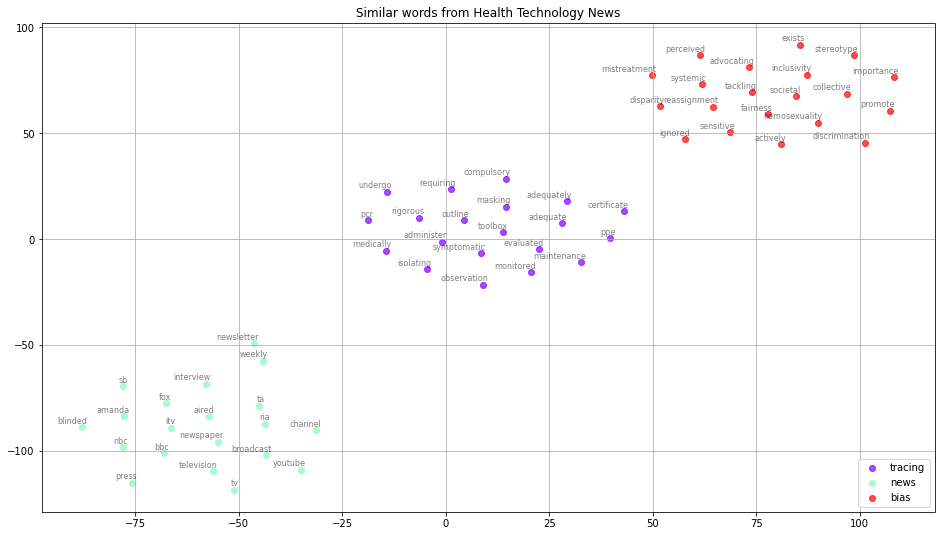

In [21]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#% matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from CNN Articles', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

# Whole plot

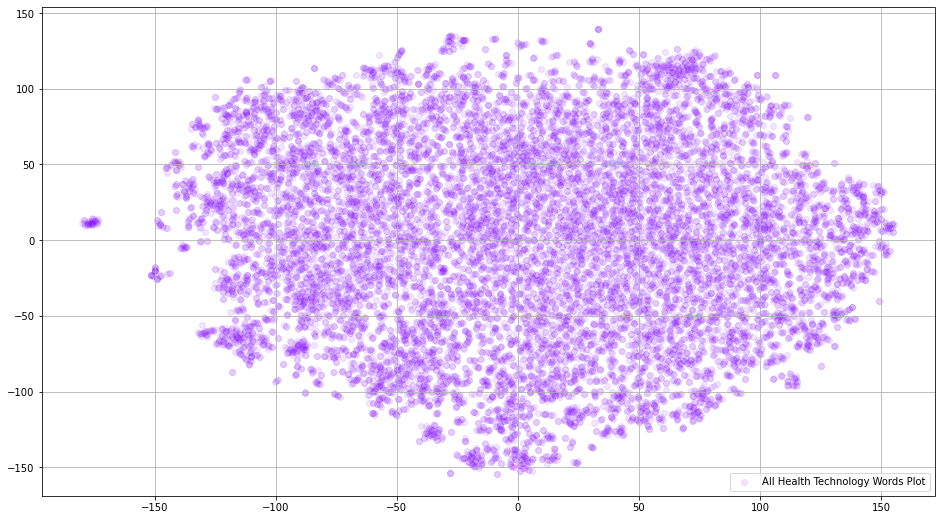

In [22]:
words_ak = []
embeddings_ak = []
for word in list(word2vecmodel.wv.vocab):
    embeddings_ak.append(word2vecmodel.wv[word])
    words_ak.append(word)
    
tsne_ak_2d = TSNE(perplexity=13, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_ak_2d = tsne_ak_2d.fit_transform(embeddings_ak)

def tsne_plot_2d(label, embeddings, words=[], a=1):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, 1))
    x = embeddings[:,0]
    y = embeddings[:,1]
    plt.scatter(x, y, c=colors, alpha=a, label=label)
    for i, word in enumerate(words):
        plt.annotate(word, alpha=0.3, xy=(x[i], y[i]), xytext=(5, 2), 
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.legend(loc=4)
    plt.grid(True)
    plt.savefig("hhh.png", format='png', dpi=600, bbox_inches='tight')
    plt.show()

tsne_plot_2d('All News Related Words Plot', embeddings_ak_2d, a=0.1)

In [23]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in word2vecmodel.wv.vocab:
        tokens.append(word2vecmodel[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=10, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(20, 20)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
        
    plt.title('t-SNE visualization for words in vocabulary')
    ax = plt.axes()
    ax.set(facecolor = "white")
    plt.show()

In [ ]:
tsne_plot(word2vecmodel)

C:\Users\awskr\AppData\Local\Temp/ipykernel_14812/2811142122.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(word2vecmodel[word])


In [ ]:


words_wp = []
embeddings_wp = []
for word in list(word2vecmodel.wv.vocab):
    embeddings_wp.append(word2vecmodel.wv[word])
    words_wp.append(word)
    
tsne_wp_3d = TSNE(perplexity=30, n_components=3, init='pca', n_iter=3500, random_state=12)
embeddings_wp_3d = tsne_wp_3d.fit_transform(embeddings_wp)

from mpl_toolkits.mplot3d import Axes3D


def tsne_plot_3d(title, label, embeddings, a=1):
    fig = plt.figure()
    ax = Axes3D(fig)
    colors = cm.rainbow(np.linspace(0, 1, 1))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], embeddings[:, 2], c=colors, alpha=a, label=label)
    plt.legend(loc=4)
    plt.title(title)
    plt.show()


tsne_plot_3d('Visualizing Embeddings using t-SNE', 'CNN Articles', embeddings_wp_3d, a=0.1)